In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [38]:
df_cars = pd.read_csv(r"IEA-EV-dataEV salesHistoricalCars.csv")
df_trucks = pd.read_csv(r"IEA-EV-dataEV salesHistoricalTrucks.csv")
df_vans = pd.read_csv(r"IEA-EV-dataEV salesHistoricalVans.csv")
df_buses = pd.read_csv(r"IEA-EV-dataEV salesHistoricalBuses.csv")

In [43]:
df = pd.concat([df_cars, df_trucks, df_vans, df_buses], ignore_index=True)

In [ ]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00


In [ ]:
ev_sales_mode = df.loc[(df['parameter'] == 'EV sales') & (df['region'] == 'World'), ['mode', 'value']].groupby('mode', as_index=False).sum()
ev_sales_mode

,mode,value
0,Buses,642193.00
1,Cars,40983597.00
2,Trucks,340126.00
3,Vans,1365763.00


In [ ]:
ev_sales_region = (
    df.loc[(df['parameter'] == 'EV sales') & (df['region'] != 'World'), ['value', 'region']]
    .groupby('region', as_index=False)
    .sum()
    .sort_values(by='value', ascending=False)
)

ev_sales_region.head()

,region,value
7,China,23358308.00
16,Europe,12096326.00
14,EU27,8944714.00
48,USA,4770934.20
19,Germany,3012826.00


In [ ]:
ev_sales_comp = (
    df.loc[(df['parameter'] == 'EV sales') & (df['region'].isin(['Germany', 'Norway'])), ['value', 'region']]
    .groupby('region', as_index=False)
    .sum()
    .sort_values(by='value', ascending=False)
)

ev_sales_comp

,region,value
0,Germany,3012826.00
1,Norway,879813.00


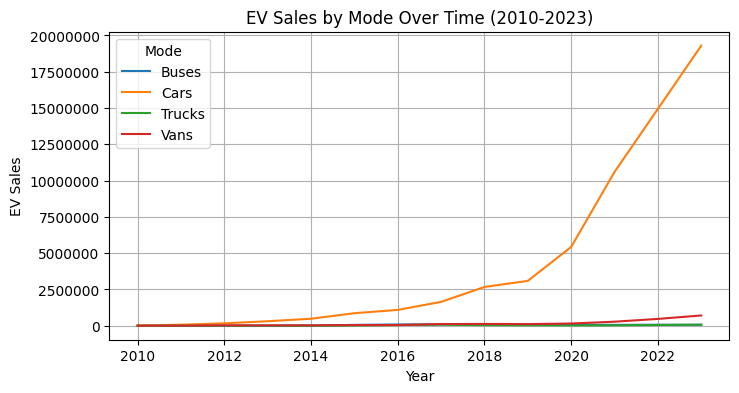

In [ ]:
ev_sales_mode_yearly = df.loc[
    (df['parameter'] == 'EV sales') & (df['region'] != 'World'),
    ['year', 'mode', 'value']
].groupby(['year', 'mode'], as_index=False).sum()

plt.figure(figsize=(8, 4))

for mode in ev_sales_mode_yearly['mode'].unique():
    mode_data = ev_sales_mode_yearly[ev_sales_mode_yearly['mode'] == mode]
    plt.plot(mode_data['year'], mode_data['value'], marker='', label=mode)

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('EV Sales by Mode Over Time (2010-2023)')
plt.legend(title='Mode')
plt.grid(True)

plt.show()


In [49]:
df_charging = pd.read_csv(r"car_charging_points.csv",  delimiter=';')

In [50]:
df_charging.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Chile,Historical,EV charging points,EV,Publicly available fast,2011,charging points,1
1,Chile,Historical,EV charging points,EV,Publicly available slow,2011,charging points,1
2,Italy,Historical,EV charging points,EV,Publicly available fast,2012,charging points,1
3,Turkiye,Historical,EV charging points,EV,Publicly available fast,2013,charging points,1
4,Turkiye,Historical,EV charging points,EV,Publicly available fast,2014,charging points,1


In [56]:
chargers_region = (
    df_charging.loc[df_charging['parameter'] == 'EV charging points']
    .groupby('region')['value']
    .sum()
    .sort_values(ascending=False)
)

chargers_region.head()

,value
region,
World,12096940
China,7643000
Europe,2515464
EU27,2030249
USA,819580


In [65]:
chargers_region_type = (
    df_charging.loc[
        (df_charging['parameter'] == 'EV charging points') &
        (df_charging['region'] != 'World')
    ]
    .groupby(['region', 'powertrain'])['value']
    .sum()
    .sort_values(ascending=False)
)

chargers_region_type.head()


region  powertrain             
China   Publicly available slow    4424000
        Publicly available fast    3219000
Europe  Publicly available slow    2210300
EU27    Publicly available slow    1818700
USA     Publicly available slow     682380
Name: value, dtype: int64